# 04 - Engenharia de Features

### Importação das bibliotecas utilizadas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_completo = pd.read_csv('/Users/micarloteixeira/Desktop/Data Science/Projetos/Rossman Store/dataset/processados/df_completo.csv')

/var/folders/9g/j7mrlvls3lg9dq5js6vpp3c40000gn/T/ipykernel_59662/2225444067.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_completo = pd.read_csv('/Users/micarloteixeira/Desktop/Data Science/Projetos/Rossman Store/dataset/processados/df_completo.csv')


## Dividindo `Date` em (day, month, year):

In [ ]:
df_completo['Year'] = pd.DatetimeIndex(df_completo['Date']).year
df_completo['Month'] = pd.DatetimeIndex(df_completo['Date']).month
df_completo['Day'] = pd.DatetimeIndex(df_completo['Date']).day

In [5]:
df_completo.head()

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   
1      2          5  2015-07-31   6064        625      1            0   
2      3          5  2015-07-31   8314        821      1            0   
3      4          5  2015-07-31  13995       1498      1            0   
4      5          5  2015-07-31   4822        559      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  Day  
0              0.0              0.0                0  2015      7   31  
1             13.0           2010.0  Jan,Apr,Jul,Oct  2015      7   31  
2             14.0           2011.0  Jan,Apr,Jul,Oct  2015      7   31  
3              0.0              0.0                0  2015      7   31  
4              0.0              0.0                0  2015      7   31

## 1. Média de Vendas por Mês
* **Observação Visual**: O gráfico de linha mostra a média de vendas para cada mês (1 a 12). As vendas começam em um nível mais baixo em Janeiro e Fevereiro, sobem atingindo um pico intermediário por volta de Março-Abril, apresentam uma leve queda e depois um segundo platô entre Maio e Julho. Após Julho, há uma queda mais acentuada até Setembro/Outubro, seguida por um aumento muito expressivo em Novembro e, **especialmente, Dezembro, que é o mês com a maior média de vendas.**
* **Interpretação**:
    * **Sazonalidade Clara**: Existe uma forte sazonalidade mensal nas vendas.
    * **Pico de Fim de Ano**: Dezembro se destaca como o mês de maiores vendas, o que é esperado devido às compras de Natal. Novembro também mostra um aumento significativo, possivelmente impulsionado por promoções de pré-Natal (como Black Friday, se aplicável ao contexto do dataset/período) ou o início das compras festivas.
    * **Início de Ano Mais Fraco**: Janeiro e Fevereiro são os meses com as médias de vendas mais baixas, o que é comum no varejo após o período de festas.
    * **Páscoa/Primavera (?)**: O pico em Março/Abril pode estar relacionado a eventos como a Páscoa ou o início da primavera (dependendo do hemisfério e costumes locais, lembrando que os dados são da Alemanha).

---

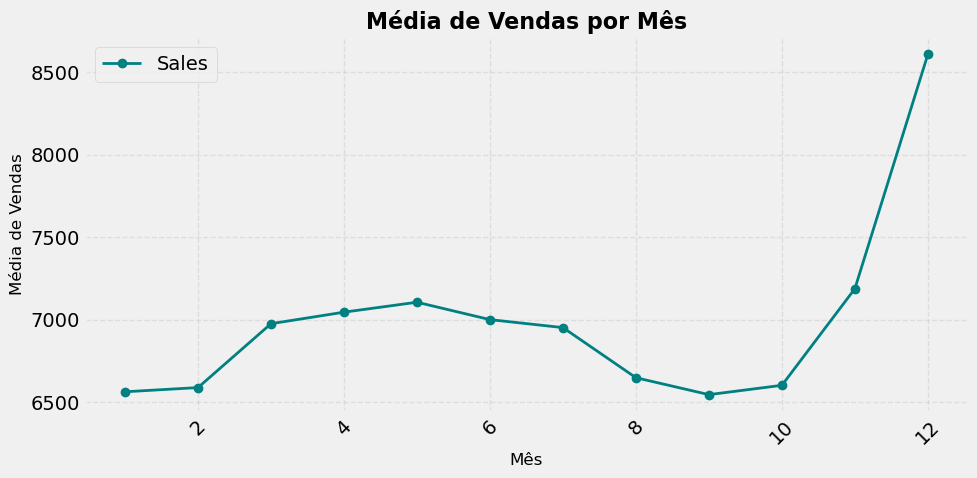

In [7]:
plt.style.use('fivethirtyeight')  # ou 'ggplot', 'fivethirtyeight', etc.

# Agrupar e calcular a média
media_mensal = df_completo.groupby('Month')[['Sales']].mean()

# Plotar
fig, ax = plt.subplots(figsize=(10, 5))
media_mensal.plot(ax=ax, marker='o', color='teal', linewidth=2)

# Título e rótulos
ax.set_title('Média de Vendas por Mês', fontsize=16, fontweight='bold')
ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Média de Vendas', fontsize=12)

# Melhorar layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)

# Ajustar ticks
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

## 2. Média de Clientes por Mês
* **Observação Visual**: O padrão da média de clientes por mês é muito similar ao da média de vendas. Inicia baixo em Janeiro/Fevereiro, sobe para um pico em Março/Abril, estabiliza com uma leve queda até Julho, cai mais em Agosto/Setembro/Outubro e depois tem um forte aumento em Novembro e um pico expressivo em Dezembro.
* **Interpretação**:
    * **Sazonalidade Consistente**: O fluxo de clientes acompanha de perto a sazonalidade das vendas, o que é esperado. Mais clientes geralmente resultam em mais vendas.
    * **Pico de Fim de Ano**: Dezembro também é o mês com a maior média de clientes.
    * **Início de Ano Mais Calmo**: Janeiro e Fevereiro registram o menor movimento de clientes.
    * A correlação forte entre `Sales` e `Customers` (0.82, observada anteriormente) é visualmente confirmada por esses padrões sazonais paralelos.

---

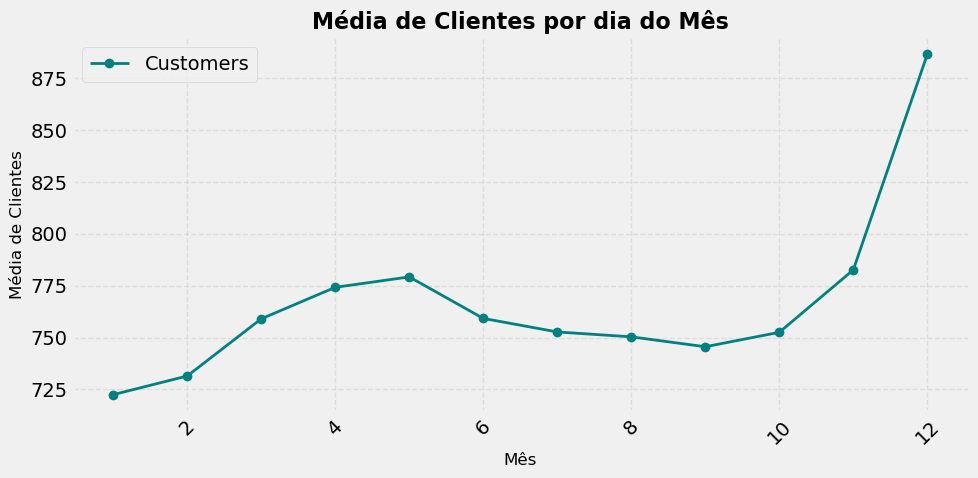

In [8]:
plt.style.use('fivethirtyeight')  # ou 'ggplot', 'fivethirtyeight', etc.

# Agrupar e calcular a média
media_mensal = df_completo.groupby('Month')[['Customers']].mean()

# Plotar
fig, ax = plt.subplots(figsize=(10, 5))
media_mensal.plot(ax=ax, marker='o', color='teal', linewidth=2)

# Título e rótulos
ax.set_title('Média de Clientes por dia do Mês', fontsize=16, fontweight='bold')
ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Média de Clientes', fontsize=12)

# Melhorar layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)

# Ajustar ticks
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

## 3. Média de Vendas por Dia do Mês
* **Observação Visual**: O gráfico mostra a variação da média de vendas ao longo dos dias do mês (1 a 31). Há uma tendência de vendas mais altas no início do mês (aproximadamente dias 1-5). Depois, há uma queda e as vendas permanecem em um nível mais baixo, com alguma flutuação, durante a maior parte do meio do mês. Parece haver um pequeno aumento nas vendas no final do mês (próximo ao dia 30/31), mas menos pronunciado que no início.
* **Interpretação**:
    * **Efeito de Início de Mês/Pagamento**: As vendas mais altas no início do mês são um padrão clássico no varejo, frequentemente associado ao recebimento de salários pela população.
    * **Variações Menores no Meio do Mês**: O período intermediário do mês parece ter vendas mais estáveis, porém mais baixas.
    * **Pequeno Repique no Fim do Mês**: Pode haver um leve aumento no final do mês, talvez relacionado a compras antes do próximo ciclo de pagamento ou promoções específicas.

---

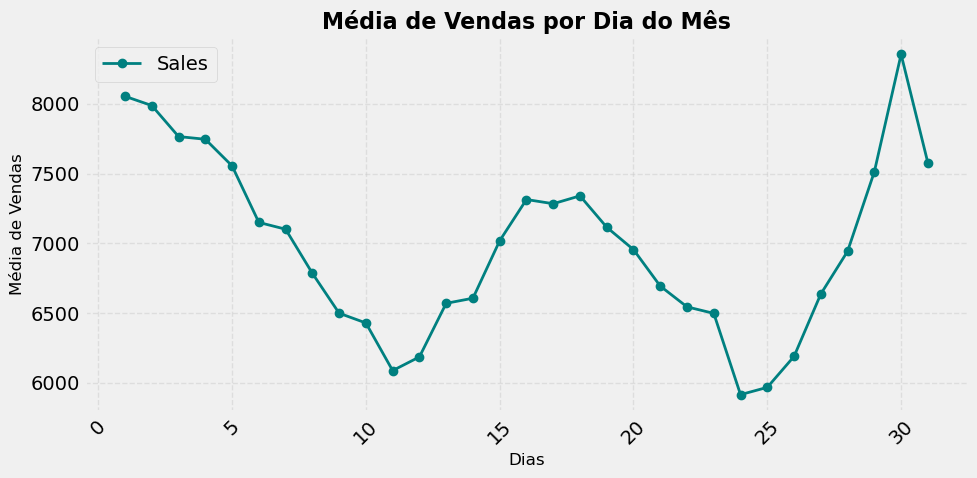

In [9]:
plt.style.use('fivethirtyeight')  # ou 'ggplot', 'fivethirtyeight', etc.

# Agrupar e calcular a média
media_mensal = df_completo.groupby('Day')[['Sales']].mean()

# Plotar
fig, ax = plt.subplots(figsize=(10, 5))
media_mensal.plot(ax=ax, marker='o', color='teal', linewidth=2)

# Título e rótulos
ax.set_title('Média de Vendas por Dia do Mês', fontsize=16, fontweight='bold')
ax.set_xlabel('Dias', fontsize=12)
ax.set_ylabel('Média de Vendas', fontsize=12)

# Melhorar layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)

# Ajustar ticks
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

## 4. Média de Clientes por Dia do Mês
* **Observação Visual**: O padrão da média de clientes por dia do mês espelha o padrão das vendas. Um número maior de clientes é observado no início do mês, seguido por uma queda e estabilização em um nível mais baixo, com um leve aumento no final do mês.
* **Interpretação**:
    * **Fluxo de Clientes e Vendas Alinhados**: Assim como na análise mensal, o fluxo de clientes acompanha o padrão de vendas diárias, reforçando a ideia de que o volume de clientes é um motor direto das vendas. O efeito de início de mês também é visível no número de clientes.

---

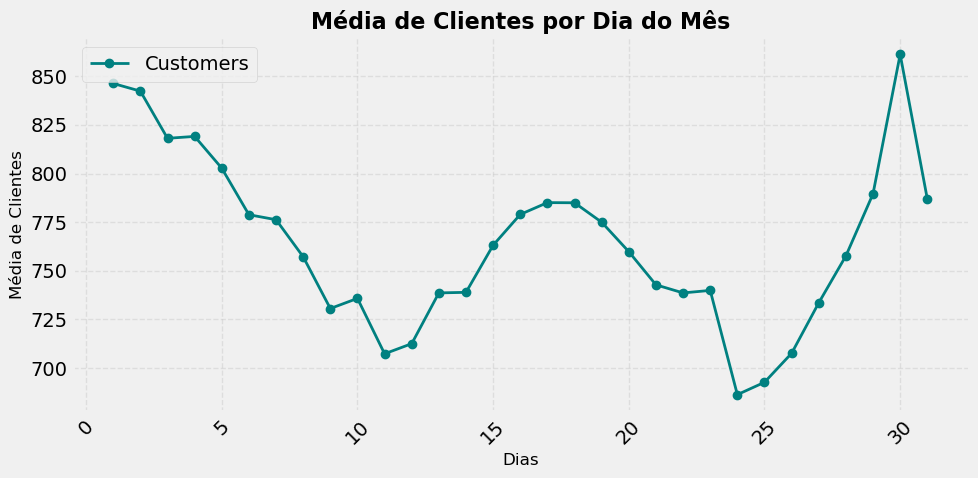

In [10]:
plt.style.use('fivethirtyeight')  # ou 'ggplot', 'fivethirtyeight', etc.

# Agrupar e calcular a média
media_mensal = df_completo.groupby('Day')[['Customers']].mean()

# Plotar
fig, ax = plt.subplots(figsize=(10, 5))
media_mensal.plot(ax=ax, marker='o', color='teal', linewidth=2)

# Título e rótulos
ax.set_title('Média de Clientes por Dia do Mês', fontsize=16, fontweight='bold')
ax.set_xlabel('Dias', fontsize=12)
ax.set_ylabel('Média de Clientes', fontsize=12)

# Melhorar layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)

# Ajustar ticks
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

## 5. Média de Vendas por Dia da Semana
* **Observação Visual**: O gráfico mostra a média de vendas para cada dia da semana (1=Segunda, ..., 7=Domingo). As vendas parecem ser mais altas no início da semana (Segunda-feira, dia 1), caem um pouco na Terça e Quarta, e depois se mantêm relativamente estáveis ou com leve aumento até Sexta/Sábado. Domingo (dia 7) tem a média de vendas mais baixa entre os dias em que as lojas estão abertas (lembre-se que o dataset foi filtrado para `Open==1`).
* **Interpretação**:
    * **Segunda-feira Forte**: Surpreendentemente, Segunda-feira (dia 1) aparece como um dia de vendas médias elevadas. Isso pode ser devido a vários fatores, como reposição de estoque após o fim de semana, ou ser o primeiro dia de promoções semanais para algumas lojas.
    * **Domingo Fraco (quando aberto)**: Mesmo para as lojas que abrem aos domingos, as vendas médias são as mais baixas, o que é comum em muitos contextos de varejo devido a horários reduzidos ou menor fluxo de consumidores.
    * **Meio da Semana e Sábado**: Os outros dias da semana apresentam um comportamento intermediário.

---


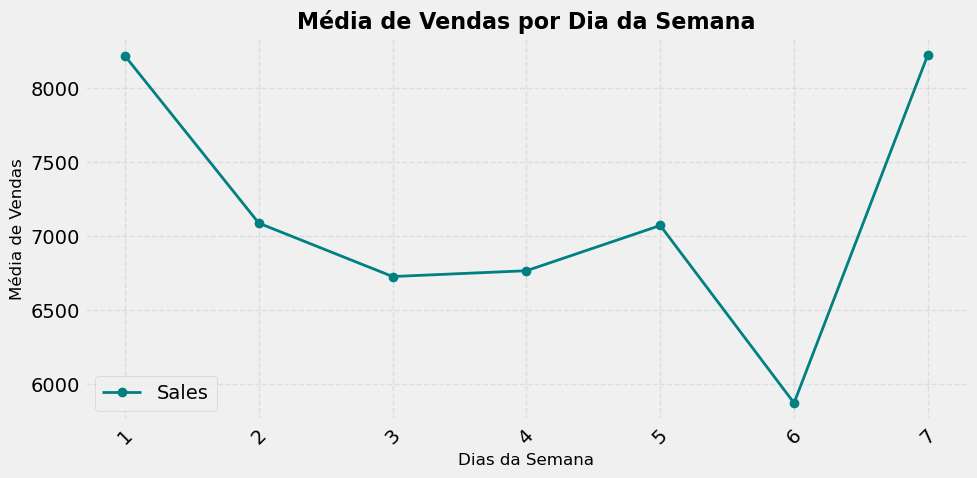

In [11]:
plt.style.use('fivethirtyeight')  # ou 'ggplot', 'fivethirtyeight', etc.

# Agrupar e calcular a média
media_mensal = df_completo.groupby('DayOfWeek')[['Sales']].mean()

# Plotar
fig, ax = plt.subplots(figsize=(10, 5))
media_mensal.plot(ax=ax, marker='o', color='teal', linewidth=2)

# Título e rótulos
ax.set_title('Média de Vendas por Dia da Semana', fontsize=16, fontweight='bold')
ax.set_xlabel('Dias da Semana', fontsize=12) # 1 = Segunda, 7 = Domingo
ax.set_ylabel('Média de Vendas', fontsize=12)

# Melhorar layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)

# Ajustar ticks
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()


## 6. Média de Clientes por Dia da Semana
* **Observação Visual**: O padrão da média de clientes por dia da semana acompanha de perto o padrão de vendas. Segunda-feira (dia 1) tem a maior média de clientes, seguido por uma queda e depois uma certa estabilidade/aumento nos dias subsequentes, com Domingo (dia 7) apresentando o menor fluxo de clientes entre os dias de loja aberta.
* **Interpretação**:
    * **Consistência com Vendas**: Confirma que os dias com maior movimento de clientes tendem a ser os dias de maiores vendas. A Segunda-feira se destaca tanto em clientes quanto em vendas.
    * **Padrão Semanal**: O padrão semanal de fluxo de clientes é um fator determinante para o padrão semanal de vendas.

---


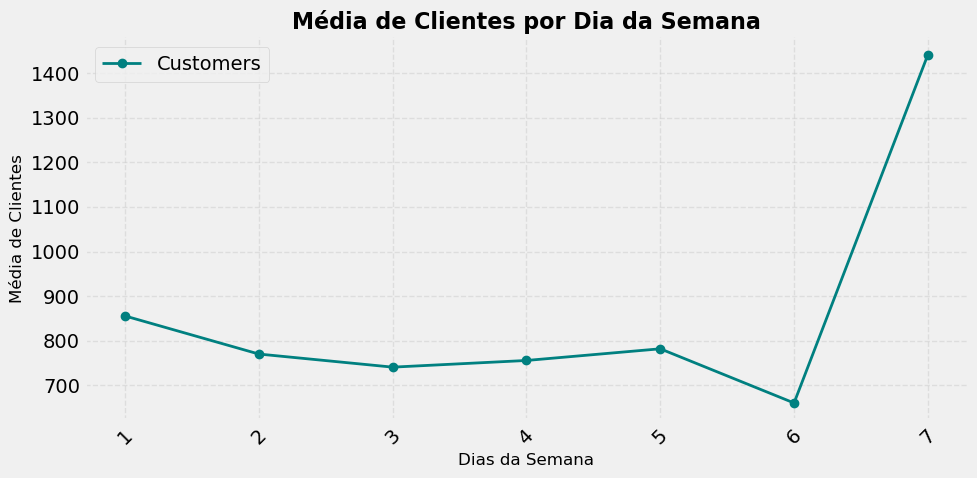

In [12]:
plt.style.use('fivethirtyeight')  # ou 'ggplot', 'fivethirtyeight', etc.

# Agrupar e calcular a média
media_mensal = df_completo.groupby('DayOfWeek')[['Customers']].mean()

# Plotar
fig, ax = plt.subplots(figsize=(10, 5))
media_mensal.plot(ax=ax, marker='o', color='teal', linewidth=2)

# Título e rótulos
ax.set_title('Média de Clientes por Dia da Semana', fontsize=16, fontweight='bold')
ax.set_xlabel('Dias da Semana', fontsize=12)
ax.set_ylabel('Média de Clientes', fontsize=12)

# Melhorar layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)

# Ajustar ticks
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

## **Conclusões Iniciais da Análise das Features de Data:**

* Ficou evidente a presença de **sazonalidade mensal** tanto nas vendas quanto no número de clientes, com picos significativos em Dezembro.
* O **início do mês** consistentemente apresenta maior volume de vendas e clientes, provavelmente devido a ciclos de pagamento.
* **Segunda-feira** se destaca como um dia forte em termos de vendas e clientes, enquanto o Domingo (para lojas abertas) é o mais fraco.

Estas análises com as features de data já fornecem insights valiosos. O próximo passo seria continuar com a engenharia de features mais complexas (como as relacionadas à competição e Promo2) e depois analisar seu impacto.

## Análise dos atributos Agrupados: Vendas por Tipo de Loja (`StoreType`) ao Longo do Tempo

Após a criação das features de data e o merge dos datasets, foram gerados gráficos para comparar o desempenho de vendas dos diferentes `StoreType`s ao longo do tempo. Esta análise foca em três granularidades: mensal, semanal e diária.

### 1. Média mensal de vendas por tipo de Loja (Por mês)

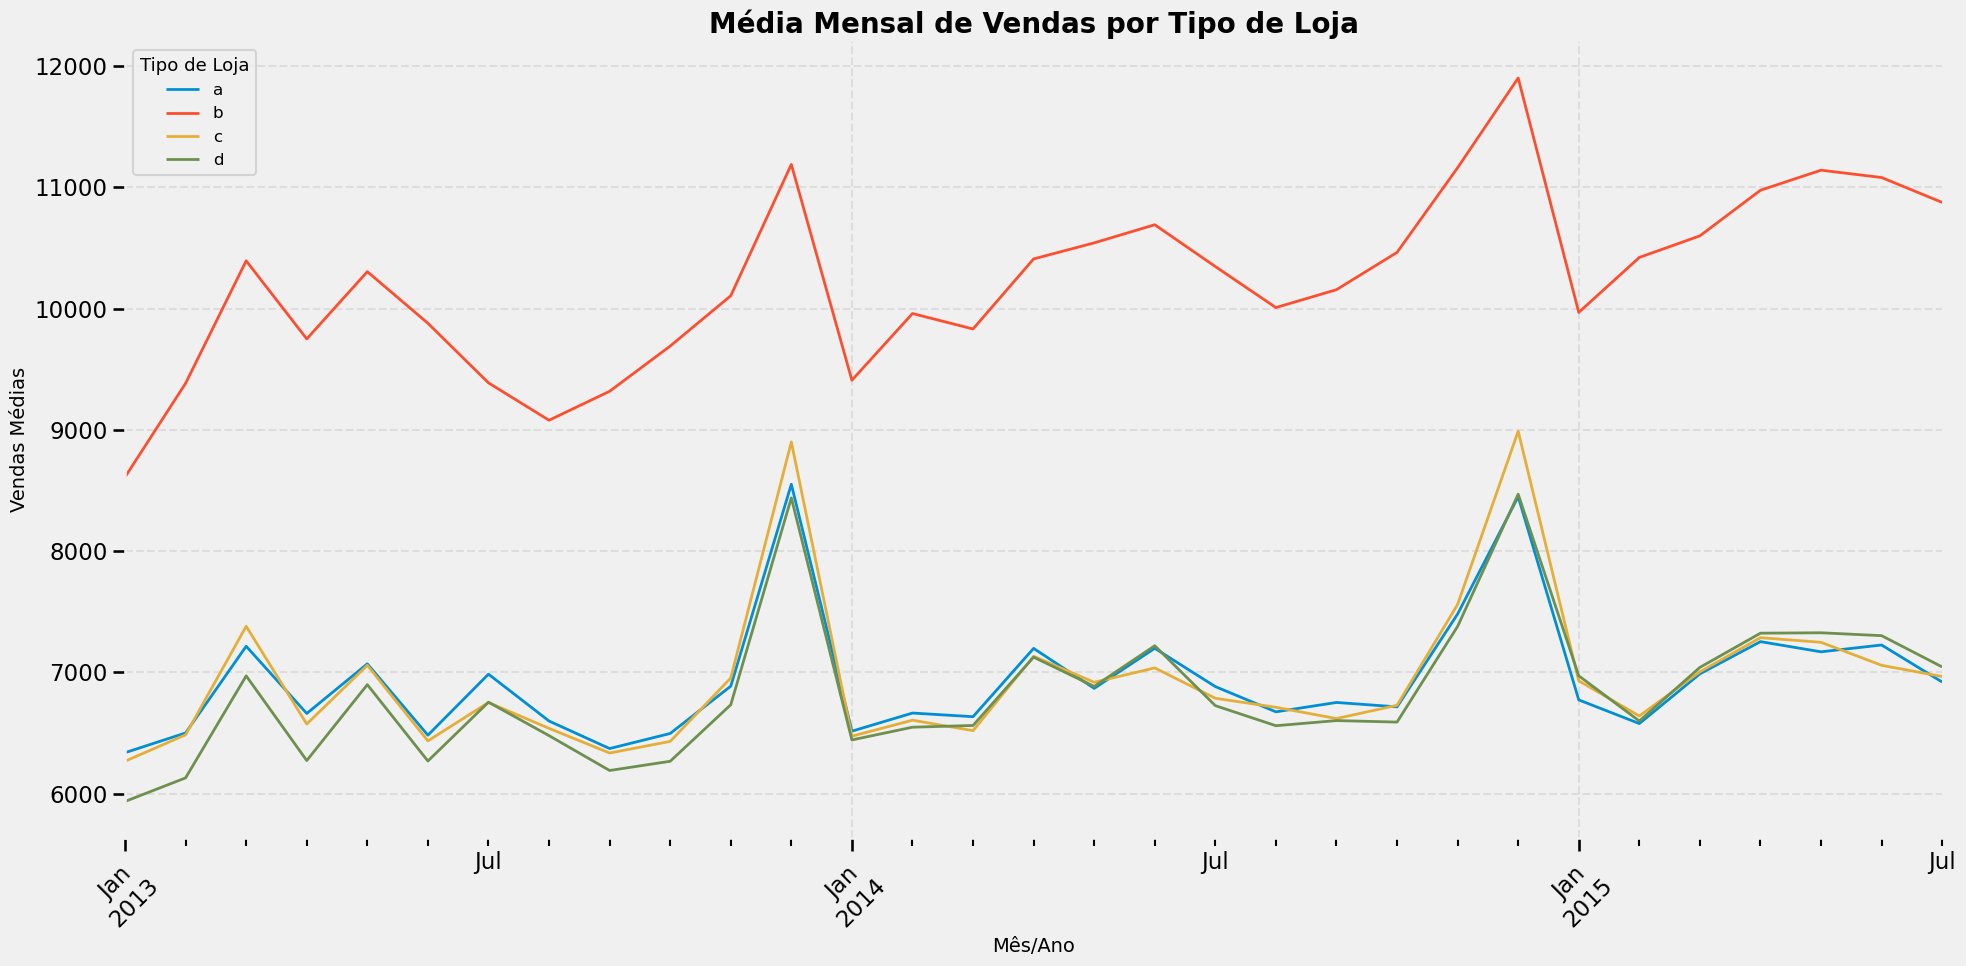

In [13]:
plt.style.use('fivethirtyeight')
sns.set_context('talk')  # Aumenta o tamanho dos elementos (ótimo para apresentações)

# Garantir que a coluna Date esteja no formato datetime
df_completo['Date'] = pd.to_datetime(df_completo['Date'])

# Criar coluna com o primeiro dia de cada mês (para agrupamento mensal)
df_completo['MesAno'] = df_completo['Date'].dt.to_period('M').dt.to_timestamp()

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(20, 10))

# Agrupar por mês e tipo de loja, calcular média de vendas e plotar
df_completo.groupby(['MesAno', 'StoreType'])['Sales'].mean().unstack().plot(ax=ax, linewidth=2)

# Título e rótulos dos eixos
ax.set_title('Média Mensal de Vendas por Tipo de Loja', fontsize=20, fontweight='bold')
ax.set_xlabel('Mês/Ano', fontsize=14)
ax.set_ylabel('Vendas Médias', fontsize=14)

# Personalizações visuais
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title='Tipo de Loja', fontsize=12, title_fontsize=13)
ax.tick_params(axis='x', rotation=45)

# Ajuste de layout
plt.tight_layout()
plt.show()

* **Observações Visuais**:
    * **Desempenho Distinto**: O `StoreType 'b'` consistentemente apresenta uma média mensal de vendas significativamente mais alta do que os outros tipos ('a', 'c', 'd').
    * **Agrupamento dos Demais Tipos**: Os `StoreType`s 'a', 'c', e 'd' têm médias de vendas muito similares entre si, formando um grupo com desempenho consideravelmente inferior ao tipo 'b'. Suas linhas no gráfico estão bem próximas e, por vezes, se sobrepõem.
    * **Sazonalidade Marcante**: Todos os tipos de loja exibem um forte padrão de sazonalidade mensal, com destaque para:
        * **Picos em Dezembro**: Um aumento expressivo nas vendas médias em Dezembro de cada ano, sendo este pico particularmente pronunciado para o `StoreType 'b'`.
        * **Vales em Janeiro/Fevereiro**: Quedas acentuadas nas vendas após o período festivo.
        * **Picos Secundários**: Observa-se um aumento nas vendas por volta de Março/Abril para todos os tipos, possivelmente relacionado à Páscoa ou ao início da primavera.
    * **Tendência Geral**: Para o `StoreType 'b'`, a tendência geral das vendas médias mensais parece relativamente estável ou com leve crescimento ao longo dos anos, com os picos e vales mantendo níveis similares. Os tipos 'a', 'c', e 'd' também parecem estáveis dentro da sua faixa de vendas mais baixa.
* **Interpretação**:
    * O `StoreType 'b'` é claramente o formato de loja com maior volume de vendas médias.
    * A sazonalidade de vendas é um fator importante para todos os tipos de loja, com o final do ano sendo crucial. O impacto dessa sazonalidade (em termos absolutos de vendas) é maior para o `StoreType 'b'`.
    * Os tipos 'a', 'c', e 'd' operam em um patamar de vendas médias muito parecido, sugerindo que podem ter características de mercado ou base de clientes semelhantes entre si, mas distintas do tipo 'b'.

---

### 2. Média semanal de vendas por Tipo de Loja (Por semana)

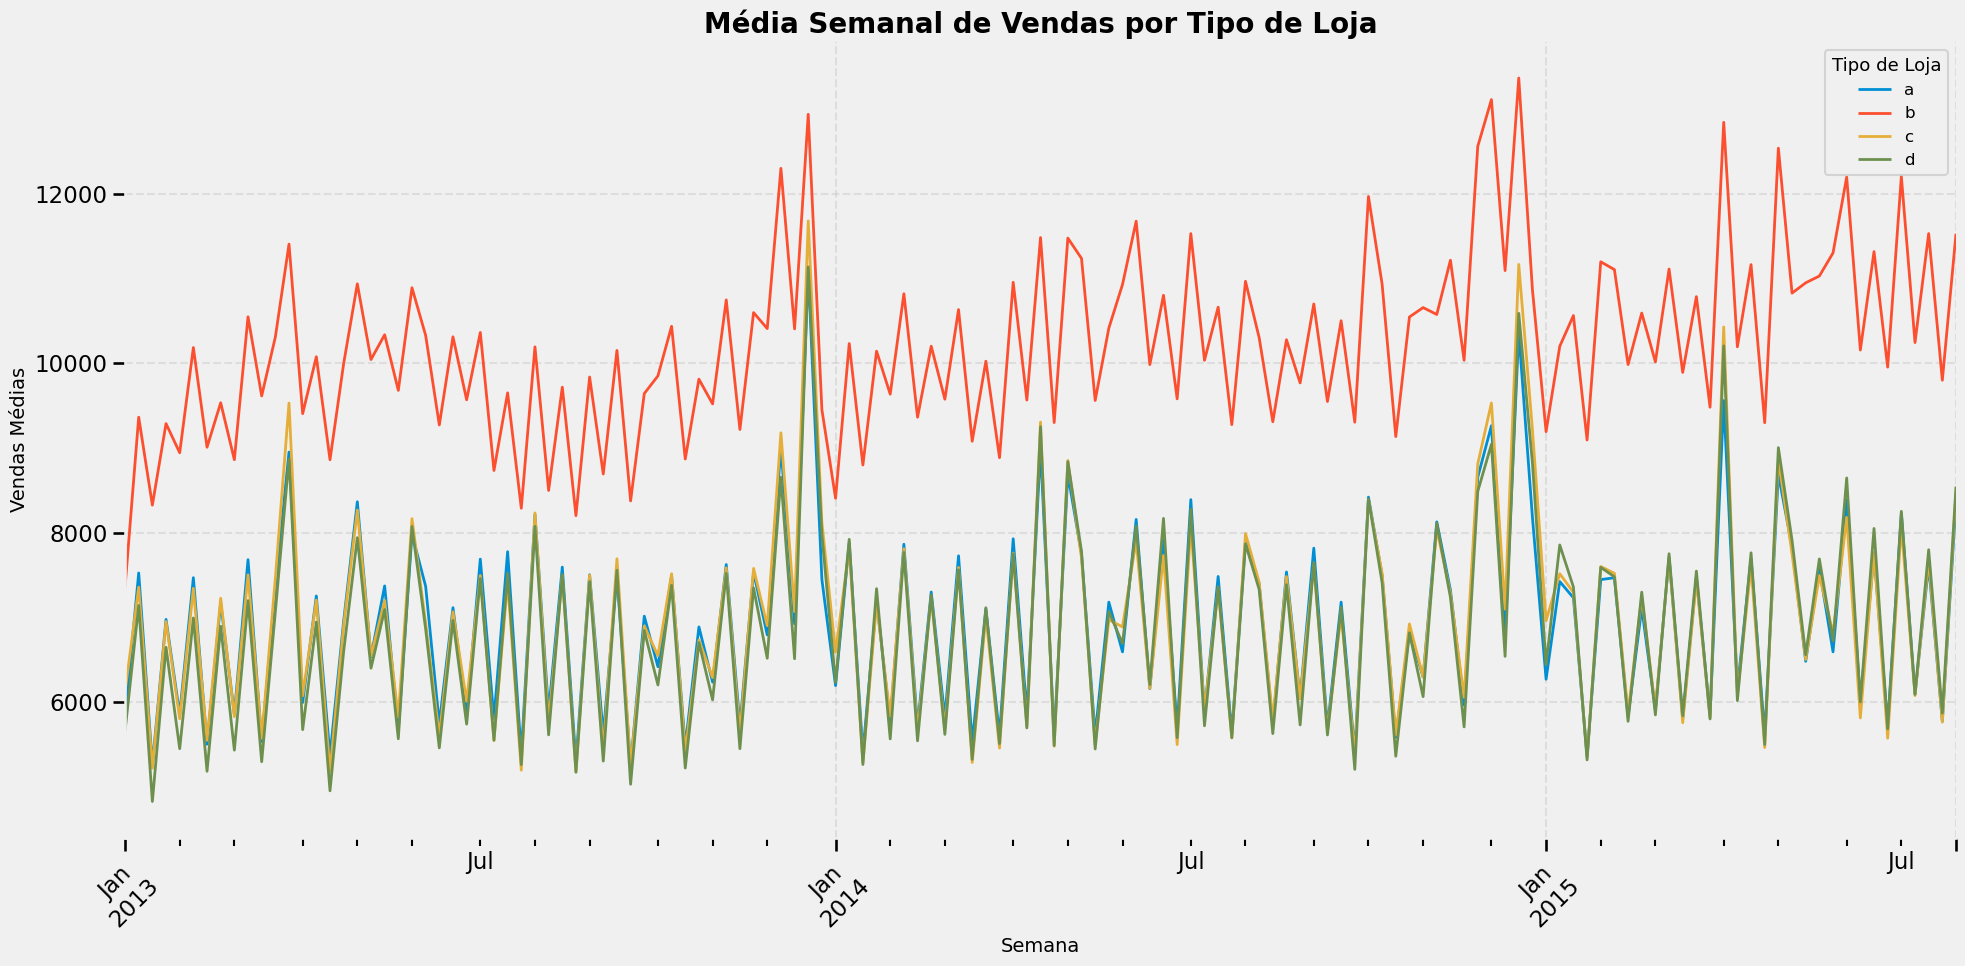

In [14]:
plt.style.use('fivethirtyeight')
sns.set_context('talk')  # Aumenta o tamanho dos elementos (ótimo para apresentações)

# Garantir que a coluna Date esteja no formato datetime
df_completo['Date'] = pd.to_datetime(df_completo['Date'])

# Definir a coluna Date como índice temporário para resample
df_temp = df_completo.set_index('Date')

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(20, 10))

# Agrupar por semana (resample) e tipo de loja, calcular média e plotar
(df_temp.groupby('StoreType')['Sales']
       .resample('W')  # 'W' = Weekly
       .mean()
       .unstack(level=0)
       .plot(ax=ax, linewidth=2))

# Título e rótulos dos eixos
ax.set_title('Média Semanal de Vendas por Tipo de Loja', fontsize=20, fontweight='bold')
ax.set_xlabel('Semana', fontsize=14)
ax.set_ylabel('Vendas Médias', fontsize=14)

# Personalizações visuais
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title='Tipo de Loja', fontsize=12, title_fontsize=13)
ax.tick_params(axis='x', rotation=45)

# Ajuste de layout
plt.tight_layout()
plt.show()

* **Observações Visuais**:
    * **Consistência com o Mensal**: Assim como no gráfico mensal, o `StoreType 'b'` se destaca com vendas médias semanais muito superiores. Os `StoreType`s 'a', 'c', e 'd' permanecem agrupados em um nível inferior.
    * **Maior Volatilidade**: A granularidade semanal revela mais flutuações de curto prazo (ruído) em comparação com a média mensal. As linhas são mais "denteadas".
    * **Padrões Sazonais Visíveis**: Apesar do ruído, os grandes padrões sazonais, como os picos acentuados próximos ao Natal e as quedas no início do ano, ainda são claramente identificáveis para todos os tipos de loja.
    * **Dificuldade de Distinção**: Para os `StoreType`s 'a', 'c', e 'd', a proximidade e sobreposição das linhas tornam difícil distinguir padrões semanais individuais sutis entre eles diretamente neste gráfico combinado.
* **Interpretação**:
    * A visualização semanal confirma a dominância do `StoreType 'b'` e a similaridade de desempenho entre os outros tipos.
    * Embora mais volátil, a análise semanal ainda suporta a forte influência da sazonalidade. Ela pode ser útil para identificar variações de mais curto prazo que seriam mascaradas pela média mensal.

---

### 3. Média diária de vendas por tipo de loja (Dia a Dia)

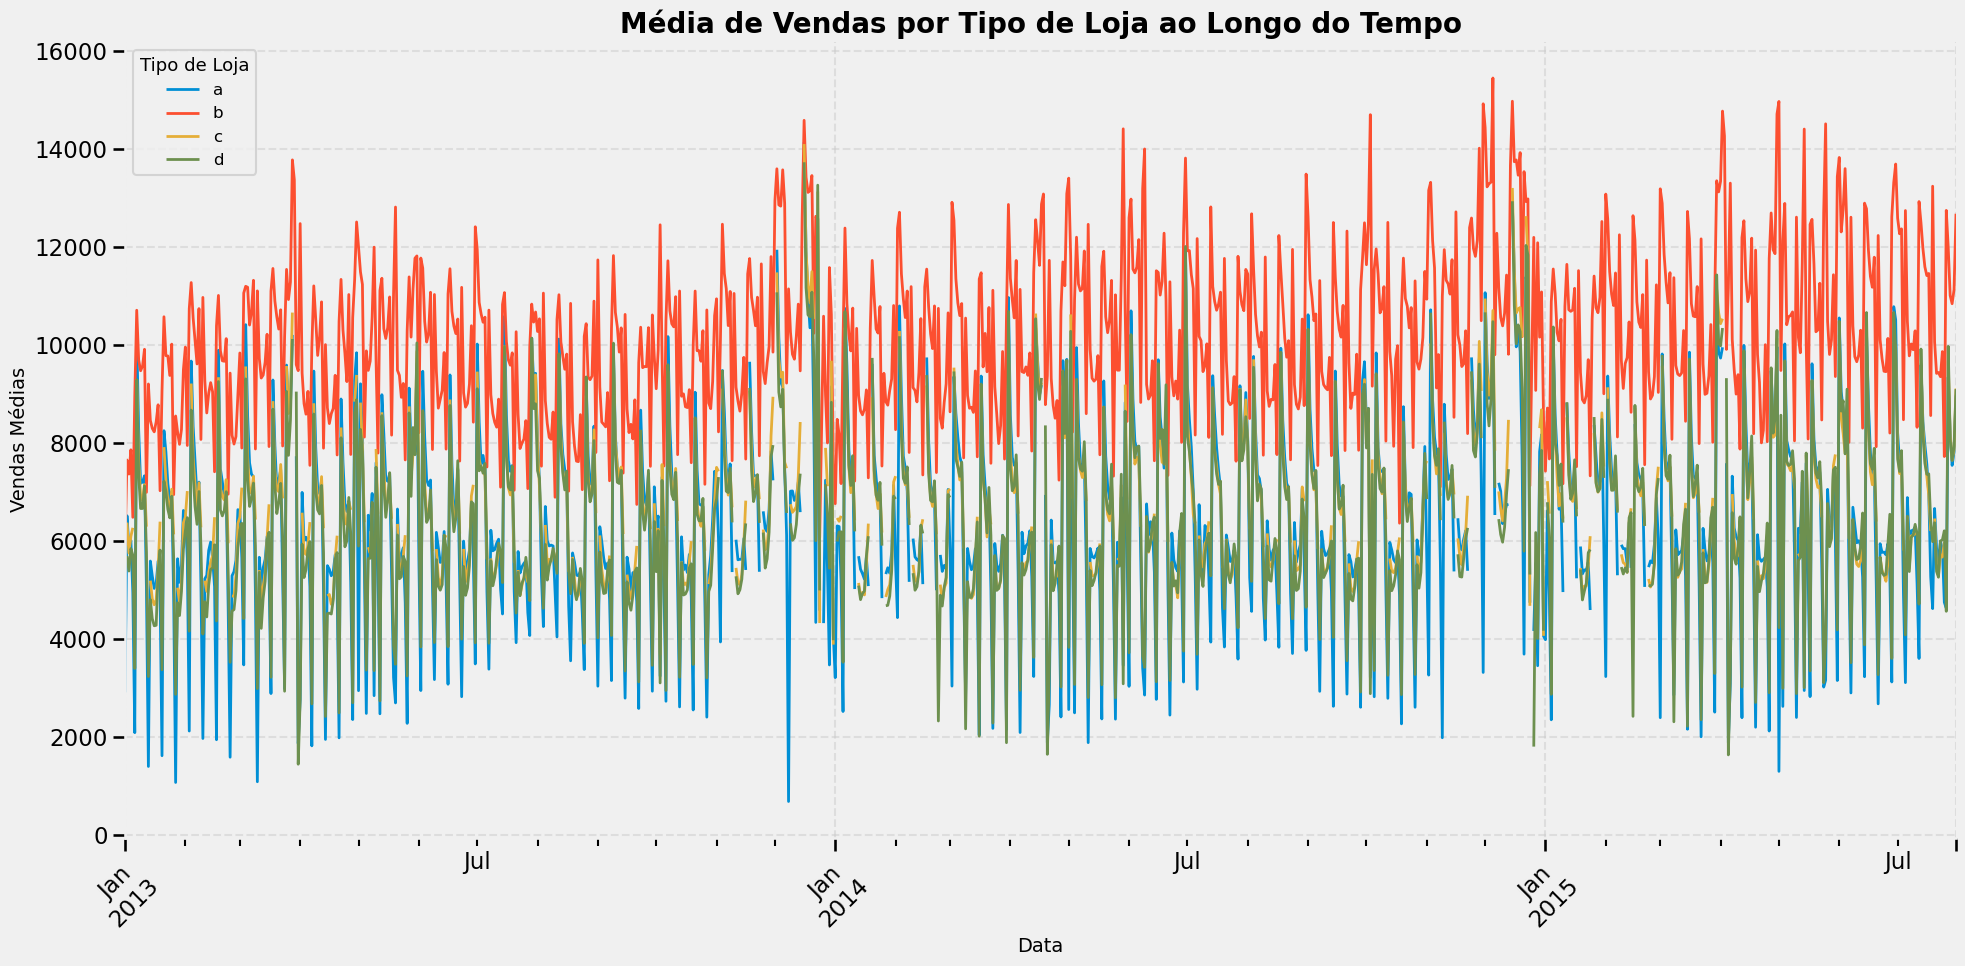

In [15]:
plt.style.use('fivethirtyeight')
sns.set_context('talk')  # Aumenta o tamanho dos elementos (ótimo para apresentações)

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(20, 10))

# Agrupar e plotar
df_completo.groupby(['Date', 'StoreType'])['Sales'].mean().unstack().plot(ax=ax, linewidth=2)

# Título e rótulos dos eixos
ax.set_title('Média de Vendas por Tipo de Loja ao Longo do Tempo', fontsize=20, fontweight='bold')
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Vendas Médias', fontsize=14)

# Personalizações visuais
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title='Tipo de Loja', fontsize=12, title_fontsize=13)
ax.tick_params(axis='x', rotation=45)

# Ajuste de layout
plt.tight_layout()
plt.show()


* **Observações Visuais**:
    * **Ruído Elevado**: Este gráfico, com granularidade diária, é o mais ruidoso dos três. As flutuações diárias são muito pronunciadas para todos os tipos de loja.
    * **Dominância do `StoreType 'b'` Mantida**: Mesmo com o ruído, a linha do `StoreType 'b'` permanece consistentemente acima das demais, indicando vendas médias diárias superiores. As flutuações absolutas para o tipo 'b' também são maiores.
    * **Dificuldade de Análise Individual para 'a', 'c', 'd'**: As linhas para os `StoreType`s 'a', 'c', e 'd' estão muito entrelaçadas e com alto ruído, tornando quase impossível discernir tendências ou padrões individuais diários de forma clara neste gráfico combinado.
    * **Picos Sazonais Macro Visíveis**: Os períodos de vendas mais altas (como Dezembro) e mais baixas (Janeiro/Fevereiro) ainda são perceptíveis como "bandas" de maior ou menor densidade de picos e vales diários, especialmente para o `StoreType 'b'`.
* **Interpretação**:
    * A análise diária confirma a performance superior do `StoreType 'b'`.
    * O alto nível de ruído neste gráfico destaca a utilidade das agregações mensais e semanais para identificar tendências e padrões sazonais mais claros, especialmente ao comparar múltiplos grupos (como os `StoreType`s) em um único visual.
    * Para uma análise diária mais aprofundada de cada `StoreType` (especialmente 'a', 'c', 'd'), poderia ser necessário plotá-los individualmente ou usar técnicas de suavização.

---

#### Suavização (Gemini)

Dummy df_completo_daily_sales created with columns: Date, StoreType, Sales.
        Date StoreType        Sales
0 2013-01-01         a  5487.979028
1 2013-01-01         b  9594.776353
2 2013-01-01         c  5667.895103
3 2013-01-01         d  5359.653185
4 2013-01-02         a  2996.082889
Shape of dummy data: (3768, 3)
Calculating daily average sales per StoreType...
Daily average sales by StoreType (head):
StoreType             a             b            c            d
Date                                                           
2013-01-01  5487.979028   9594.776353  5667.895103  5359.653185
2013-01-02  2996.082889  10862.927377  4913.130861  6021.944783
2013-01-03  3008.616632  10777.189639  3939.445774  5047.674527
2013-01-04  6605.962180   8345.298901  5343.891861  6420.686308
2013-01-05  7030.501192  10391.862027  3116.150021  7834.961292
Applying 7-day rolling mean...
Smoothed (7D) daily average sales by StoreType (head):
StoreType             a             b            c   

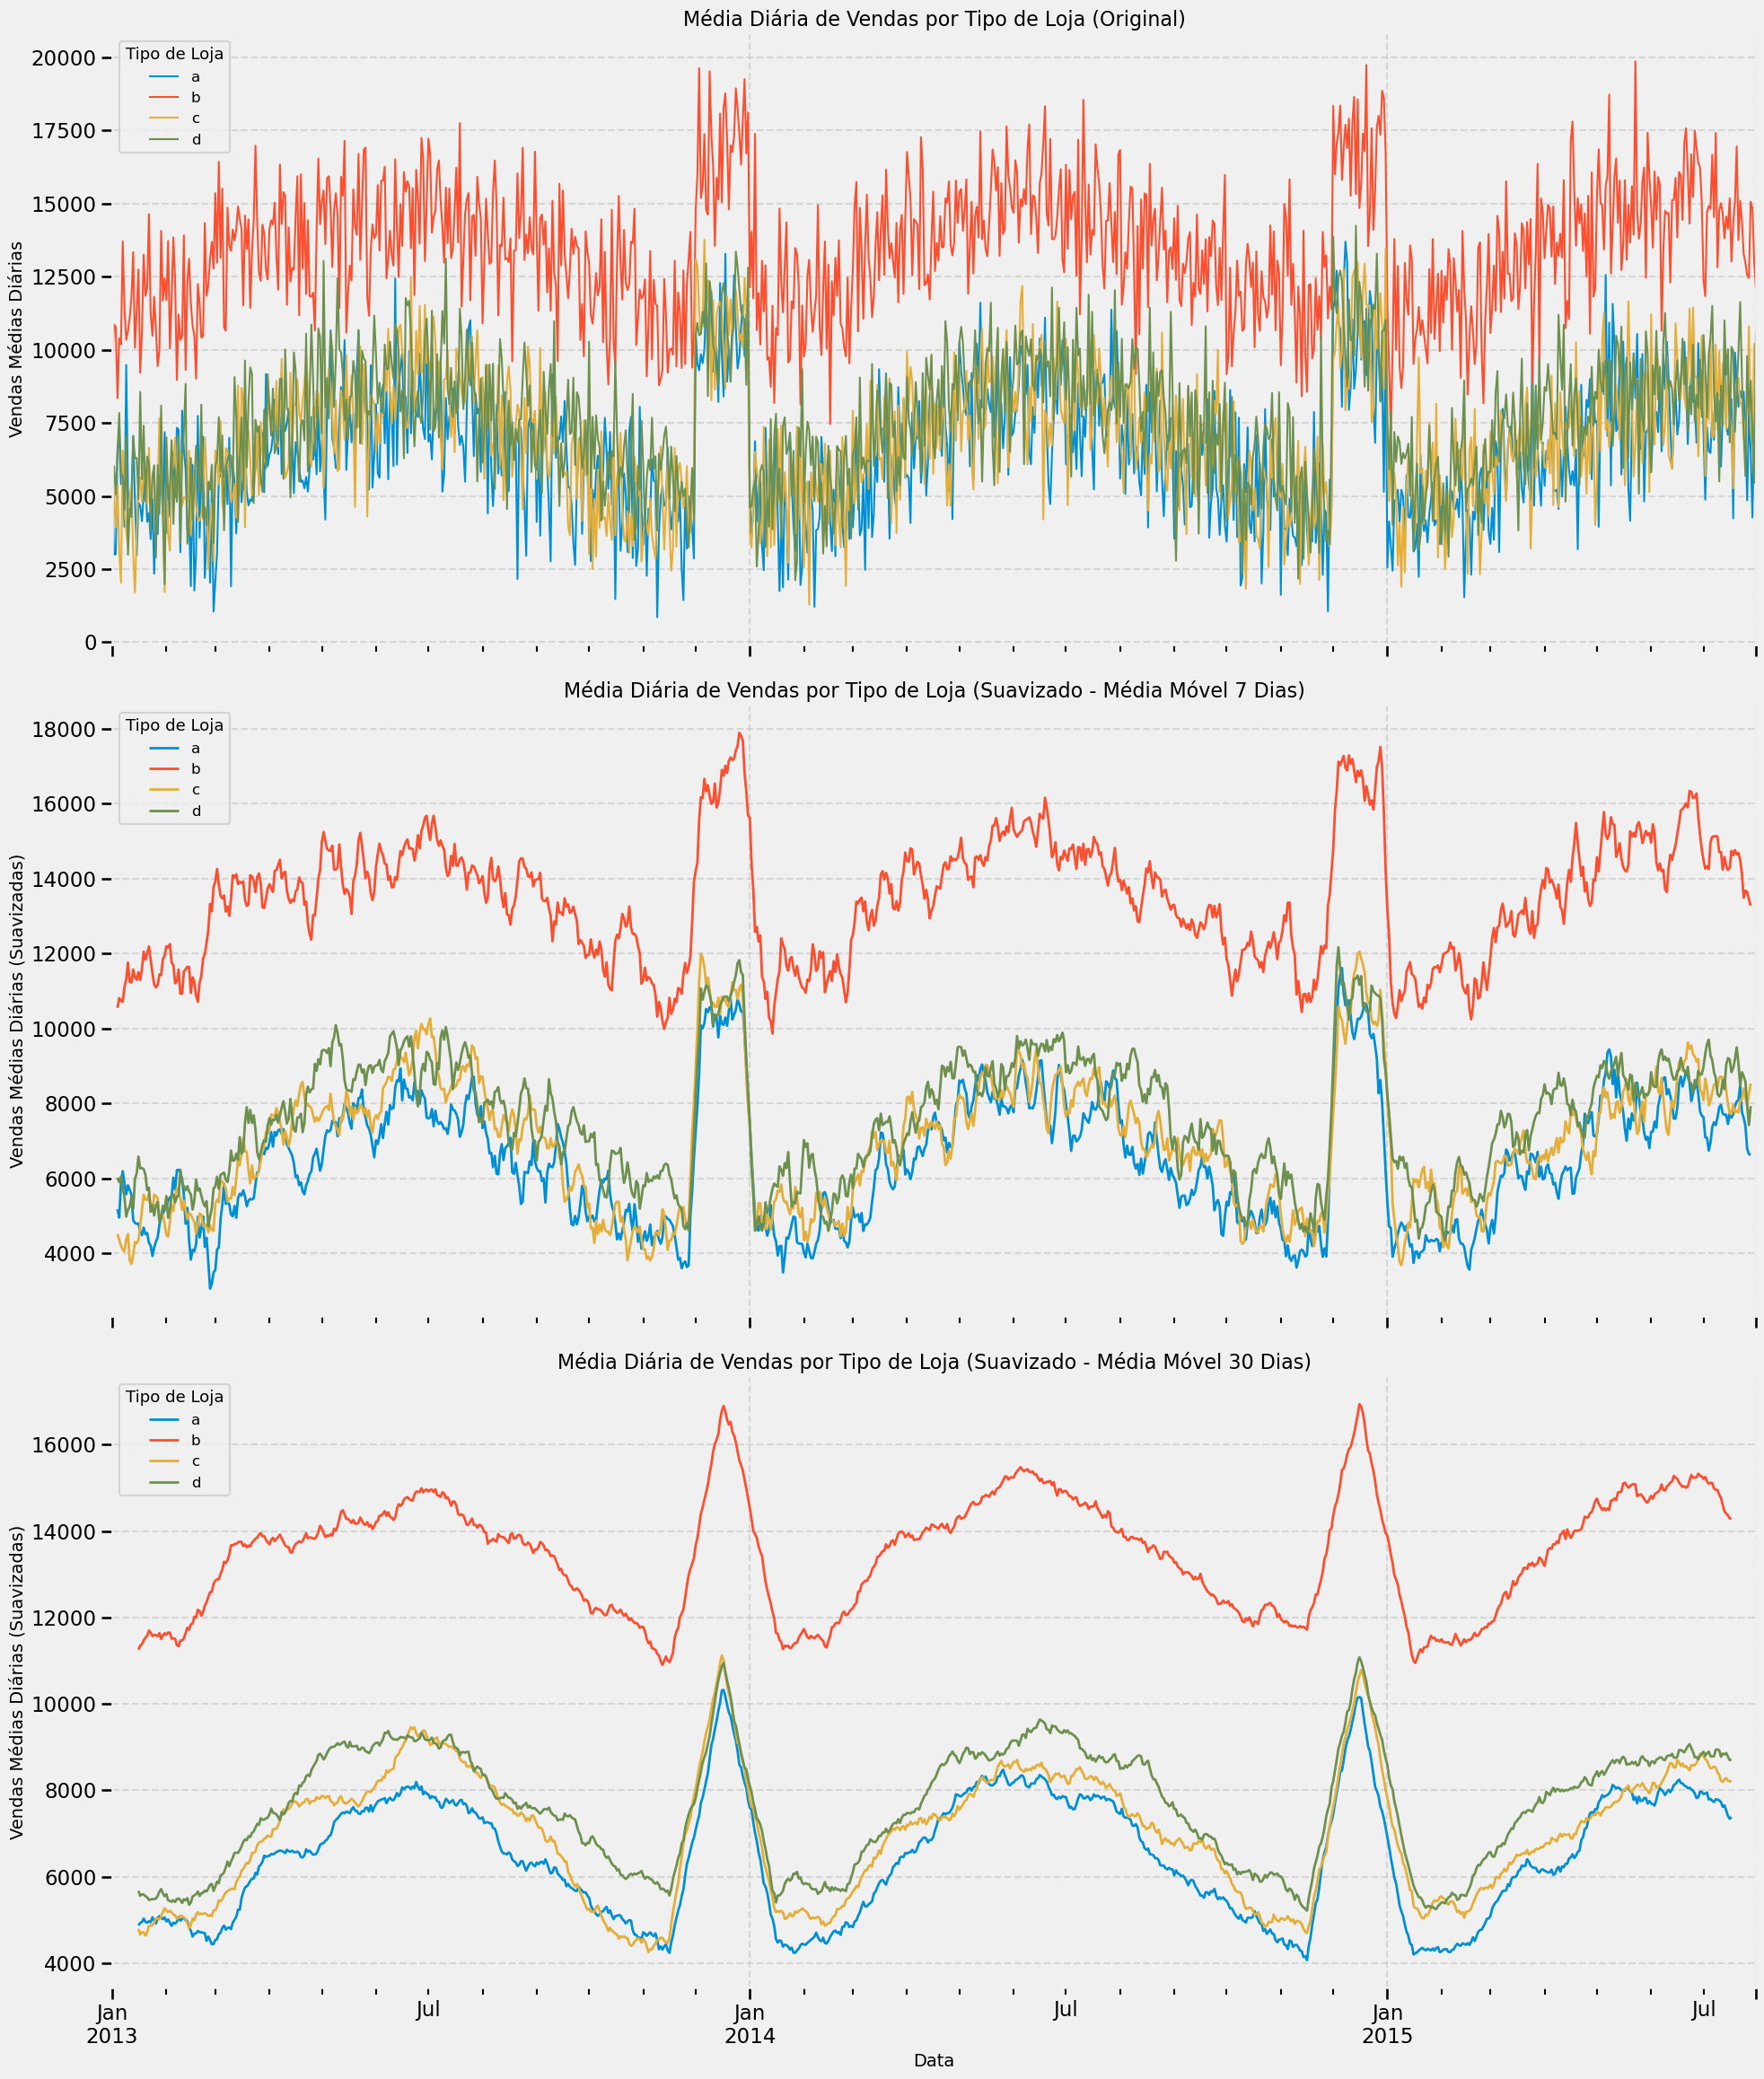

In [16]:
date_rng = pd.date_range(start='2013-01-01', end='2015-07-31', freq='D')
store_types = ['a', 'b', 'c', 'd']
num_stores_per_type = {'a': 50, 'b': 10, 'c': 30, 'd': 20} # Arbitrary numbers
all_stores = []
for stype, count in num_stores_per_type.items():
    for i in range(count):
        all_stores.append(f"{stype}_store_{i+1}")


# Generate sample data for df_completo
data = []
for date in date_rng:
    for stype in store_types:
        # Simulate sales with seasonality and noise
        base_sales = {'a': 6000, 'b': 10000, 'c': 6500, 'd': 7000}
        month_effect = np.sin(date.month * 2 * np.pi / 12 - np.pi / 2) * 2000  # Simple seasonality
        if date.month == 12: # December peak
            month_effect = 4000
        if date.month in [1,2]: # Jan/Feb dip
            month_effect = -1500
        noise = np.random.normal(0, 1500)
        sales = base_sales[stype] + month_effect + noise
        if stype == 'b': # Make store type b consistently higher
            sales += 3000 + np.random.normal(0,500) # Add more for type b
        sales = max(0, sales) # Sales can't be negative
        data.append([date, stype, sales])

df_completo_daily_sales = pd.DataFrame(data, columns=['Date', 'StoreType', 'Sales'])
df_completo_daily_sales['Date'] = pd.to_datetime(df_completo_daily_sales['Date'])

print("Dummy df_completo_daily_sales created with columns: Date, StoreType, Sales.")
print(df_completo_daily_sales.head())
print(f"Shape of dummy data: {df_completo_daily_sales.shape}")


# Calculate daily average sales per store type
print("Calculating daily average sales per StoreType...")
daily_sales_by_type = df_completo_daily_sales.groupby(['Date', 'StoreType'])['Sales'].mean().unstack(level='StoreType')
print("Daily average sales by StoreType (head):")
print(daily_sales_by_type.head())

# Apply rolling mean to smooth the data
# Let's use a 7-day and a 30-day rolling window for comparison
print("Applying 7-day rolling mean...")
smoothed_sales_7d = daily_sales_by_type.rolling(window=7, center=True).mean()
print("Smoothed (7D) daily average sales by StoreType (head):")
print(smoothed_sales_7d.head())

print("Applying 30-day rolling mean...")
smoothed_sales_30d = daily_sales_by_type.rolling(window=30, center=True).mean()
print("Smoothed (30D) daily average sales by StoreType (head):")
print(smoothed_sales_30d.head())


# Plotting
print("Generating plots...")
plt.style.use('fivethirtyeight')
sns.set_context('talk')

fig, axes = plt.subplots(3, 1, figsize=(20, 25), sharex=True) # Adjusted to 3 rows, 1 col

# 1. Original (Noisy) Plot
daily_sales_by_type.plot(ax=axes[0], linewidth=1.5)
axes[0].set_title('Média Diária de Vendas por Tipo de Loja (Original)', fontsize=16)
axes[0].set_xlabel('Data', fontsize=14)
axes[0].set_ylabel('Vendas Médias Diárias', fontsize=14)
axes[0].legend(title='Tipo de Loja', fontsize=12, title_fontsize=13)
axes[0].grid(True, linestyle='--', alpha=0.7)

# 2. Smoothed Plot (7-day rolling mean)
smoothed_sales_7d.plot(ax=axes[1], linewidth=2)
axes[1].set_title('Média Diária de Vendas por Tipo de Loja (Suavizado - Média Móvel 7 Dias)', fontsize=16)
axes[1].set_xlabel('Data', fontsize=14)
axes[1].set_ylabel('Vendas Médias Diárias (Suavizadas)', fontsize=14)
axes[1].legend(title='Tipo de Loja', fontsize=12, title_fontsize=13)
axes[1].grid(True, linestyle='--', alpha=0.7)

# 3. Smoothed Plot (30-day rolling mean)
smoothed_sales_30d.plot(ax=axes[2], linewidth=2)
axes[2].set_title('Média Diária de Vendas por Tipo de Loja (Suavizado - Média Móvel 30 Dias)', fontsize=16)
axes[2].set_xlabel('Data', fontsize=14)
axes[2].set_ylabel('Vendas Médias Diárias (Suavizadas)', fontsize=14)
axes[2].legend(title='Tipo de Loja', fontsize=12, title_fontsize=13)
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout to prevent title overlap
smoothed_plot_path = "smoothed_daily_sales_by_storetype.png"
plt.show() # Comment out for non-interactive environments #

### **Conclusões Gerais da Análise Agrupada por `StoreType`:**

* O `StoreType 'b'` é consistentemente o tipo de loja com maior volume de vendas médias, seja na análise diária, semanal ou mensal.
* Os `StoreType`s 'a', 'c', e 'd' têm um desempenho de vendas médias muito similar entre si, operando em um patamar significativamente inferior ao tipo 'b'.
* Todos os tipos de loja são afetados por padrões sazonais, com destaque para o aumento expressivo de vendas no final do ano.
* A agregação dos dados (mensal ou semanal) é muito útil para suavizar o ruído diário e permitir uma melhor visualização e comparação das tendências e da sazonalidade entre os diferentes tipos de loja.

## Análise da Influência da Promoção (`Promo`) nas Vendas (`Sales`)

Um dos objetivos importantes na análise de dados de vendas é entender o impacto das promoções. Nesta seção, vamos investigar se os dias em que uma promoção estava ativa (`Promo == 1`) resultaram em um volume de vendas diferente dos dias sem promoção (`Promo == 0`).

Para isso, vamos:
1.  Calcular e comparar as principais estatísticas descritivas das vendas para cada um desses dois grupos (com e sem promoção).
2.  Visualizar essas diferenças usando boxplots e gráficos de barras para facilitar a interpretação.

Isso nos ajudará a quantificar e visualizar o possível "lift" (aumento) nas vendas proporcionado pelas promoções.

Estatísticas Descritivas de Vendas (Sales) agrupadas por Promoção (Promo):

          count         mean          std  min     25%     50%     75%  \
Promo                                                                    
0      467496.0  5929.407603  2629.648385  0.0  4242.0  5459.0  7004.0   
1      376896.0  8228.281239  3175.759157  0.0  6069.0  7649.0  9686.0   

           max  
Promo           
0      41551.0  
1      38722.0  
--------------------------------------------------

Média de Vendas sem Promoção (Promo=0): 5,929.41
Média de Vendas com Promoção (Promo=1): 8,228.28
Aumento percentual médio nas vendas com promoção: 38.77%
--------------------------------------------------


/var/folders/9g/j7mrlvls3lg9dq5js6vpp3c40000gn/T/ipykernel_53076/37367482.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promo', y='Sales', data=df_completo, palette=['lightcoral', 'skyblue'], ax=axes[0])



Código para gráficos comparativos de Promo vs Sales em subplots gerado.


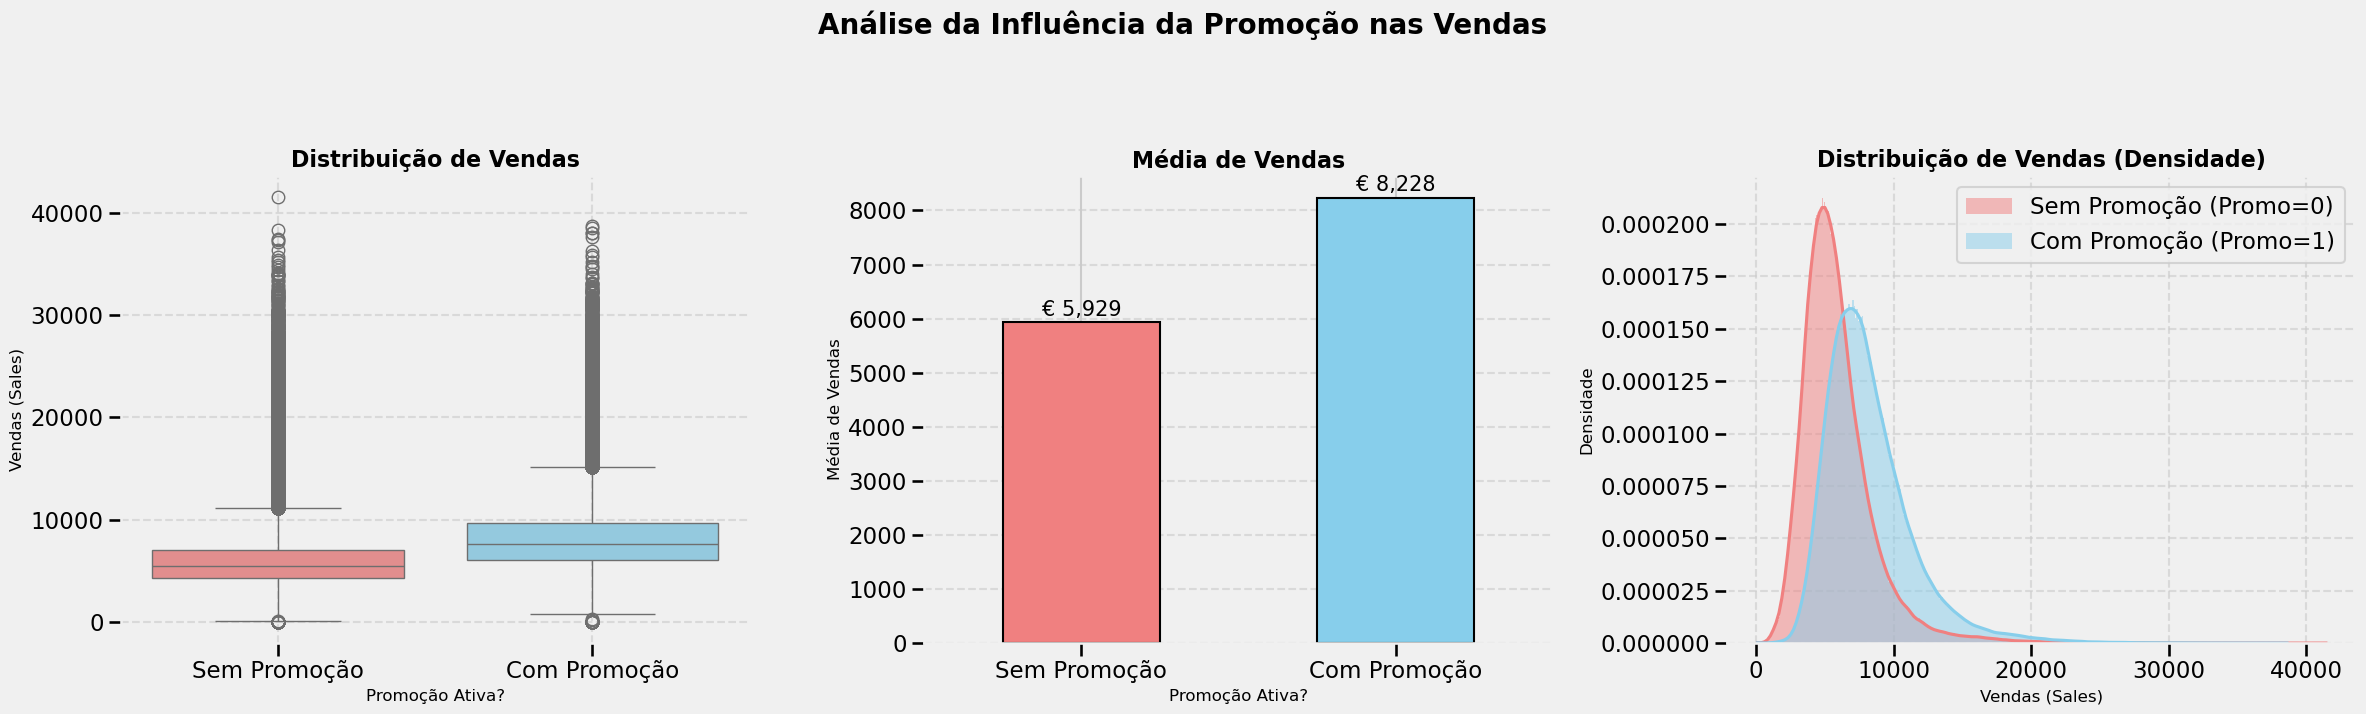

In [17]:
# 1. Comparando Estatísticas Descritivas (esta parte permanece a mesma, apenas para output textual)
print("Estatísticas Descritivas de Vendas (Sales) agrupadas por Promoção (Promo):\n")
desc_sales_promo = df_completo.groupby('Promo')['Sales'].describe()
print(desc_sales_promo)
print("-" * 50)

# Calcular a diferença percentual na média de vendas
if 0 in desc_sales_promo.index and 1 in desc_sales_promo.index:
    mean_sales_no_promo = desc_sales_promo.loc[0, 'mean']
    mean_sales_with_promo = desc_sales_promo.loc[1, 'mean']

    if mean_sales_no_promo > 0: # Evitar divisão por zero
        lift_percentual = ((mean_sales_with_promo - mean_sales_no_promo) / mean_sales_no_promo) * 100
        print(f"\nMédia de Vendas sem Promoção (Promo=0): {mean_sales_no_promo:,.2f}")
        print(f"Média de Vendas com Promoção (Promo=1): {mean_sales_with_promo:,.2f}")
        print(f"Aumento percentual médio nas vendas com promoção: {lift_percentual:.2f}%")
    else:
        print("\nMédia de vendas sem promoção é zero, não é possível calcular o lift percentual diretamente.")
else:
    print("\nNão foi possível encontrar dados para Promo=0 e Promo=1 para calcular o lift.")

print("-" * 50)


# 2. Visualizações Consolidadas em Subplots

# Estilo dos gráficos
plt.style.use('fivethirtyeight')
sns.set_context('talk')

# Criar uma figura com 3 subplots lado a lado
# Ajuste o figsize para uma boa visualização (largura, altura)
fig, axes = plt.subplots(1, 3, figsize=(24, 7)) # 1 linha, 3 colunas

fig.suptitle('Análise da Influência da Promoção nas Vendas', fontsize=20, fontweight='bold', y=1.03)

# a) Boxplot de Vendas por Promoção (no primeiro subplot: axes[0])
sns.boxplot(x='Promo', y='Sales', data=df_completo, palette=['lightcoral', 'skyblue'], ax=axes[0])
axes[0].set_title('Distribuição de Vendas', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Promoção Ativa?', fontsize=12)
axes[0].set_ylabel('Vendas (Sales)', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Sem Promoção', 'Com Promoção'])
axes[0].grid(True, linestyle='--', alpha=0.6)

# b) Gráfico de Barras da Média de Vendas por Promoção (no segundo subplot: axes[1])
mean_sales_by_promo_plot_data = df_completo.groupby('Promo')['Sales'].mean()
bars = mean_sales_by_promo_plot_data.plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black', ax=axes[1])
axes[1].set_title('Média de Vendas', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Promoção Ativa?', fontsize=12)
axes[1].set_ylabel('Média de Vendas', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Sem Promoção', 'Com Promoção'], rotation=0)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Adicionar valores nas barras
for bar in bars.patches:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2.0, yval + 50, f'€ {yval:,.0f}',
                 ha='center', va='bottom', fontsize=15, color='black')

# c) Histogramas/Density Plots (no terceiro subplot: axes[2])
sns.histplot(df_completo[df_completo['Promo'] == 0]['Sales'], color="lightcoral", label='Sem Promoção (Promo=0)', kde=True, stat="density", linewidth=0, ax=axes[2])
sns.histplot(df_completo[df_completo['Promo'] == 1]['Sales'], color="skyblue", label='Com Promoção (Promo=1)', kde=True, stat="density", linewidth=0, ax=axes[2])
axes[2].set_title('Distribuição de Vendas (Densidade)', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Vendas (Sales)', fontsize=12)
axes[2].set_ylabel('Densidade', fontsize=12)
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.6)
# Pode ser útil limitar o eixo X se houver outliers extremos
# axes[2].set_xlim(0, df_completo['Sales'].quantile(0.95))

# Ajustar layout para evitar sobreposição e dar espaço para o suptitle
plt.tight_layout(rect=[0, 0, 1, 0.95])

# plt.show()
# fig.savefig('comparativo_promo_sales_subplots.png', dpi=300)

print("\nCódigo para gráficos comparativos de Promo vs Sales em subplots gerado.")

As estatísticas descritivas principais mostram:
* **Sem Promoção (Promo = 0)**:
    * Contagem de dias: 467.496
    * Média de Vendas: € 5.929,41
    * Mediana de Vendas (50%): € 5.459,00
    * Desvio Padrão: € 2.629,65
* **Com Promoção (Promo = 1)**:
    * Contagem de dias: 376.896
    * Média de Vendas: € 8.228,28
    * Mediana de Vendas (50%): € 7.649,00
    * Desvio Padrão: € 3.175,76

Isso resulta em um **aumento percentual médio nas vendas com promoção de 38.77%**. Este é um "lift" bastante significativo.

### 1. Boxplot: Distribuição de Vendas com e sem Promoção

* **Observação Visual**: O gráfico de boxplot mostra duas distribuições lado a lado para as vendas, uma para "Sem Promoção" (Promo=0) e outra para "Com Promoção" (Promo=1).
    * **Mediana (Linha central da caixa)**: A mediana das vendas para os dias "Com Promoção" é visivelmente mais alta do que a mediana para os dias "Sem Promoção". A linha central da caixa azul (Com Promoção) está posicionada em um nível de vendas superior ao da caixa vermelha (Sem Promoção).
    * **Intervalo Interquartil (IQR - Altura da caixa)**: A caixa azul (`Promo == 1`) parece ser um pouco mais "alta" (maior IQR) e está totalmente deslocada para cima em relação à caixa vermelha (`Promo == 0`). Isso indica que o intervalo central de 50% das vendas é maior e ocorre em valores de vendas mais elevados quando há promoção.
    * **Whiskers (Hastes) e Outliers**: Ambas as distribuições possuem outliers (pontos individuais acima das hastes), indicando dias com vendas excepcionalmente altas. A dispersão geral das vendas (incluindo os whiskers) parece ser maior nos dias com promoção.
* **Interpretação**:
    * O boxplot confirma visualmente que as vendas tendem a ser significativamente mais altas nos dias com promoção. Não apenas a mediana é maior, mas toda a "caixa" (representando 50% dos dados centrais) está deslocada para valores de vendas superiores.
    * A maior dispersão (IQR e possivelmente whiskers mais longos) nos dias com promoção pode indicar que, embora as vendas sejam geralmente mais altas, elas também podem ser um pouco mais variáveis.

---

### 2. Gráfico de Barras: Média de Vendas com e sem Promoção

* **Observação Visual**: Este gráfico apresenta duas barras, comparando diretamente a média de vendas.
    * A barra azul ("Com Promoção", `Promo == 1`) é substancialmente mais alta (€ 8.228) do que a barra vermelha ("Sem Promoção", `Promo == 0`, € 5.929).
* **Interpretação**:
    * Este gráfico oferece a comparação mais direta e clara do impacto médio das promoções. Ele quantifica visualmente o aumento médio de aproximadamente € 2.299 nas vendas diárias quando uma promoção está ativa.
    * Reforça a conclusão de que as promoções têm um efeito positivo e considerável na média de vendas.

---

### 3. Gráfico de Densidade/Histograma: Distribuição de Vendas com e sem Promoção (Densidade)

* **Observação Visual**: Este gráfico sobrepõe as curvas de densidade (aproximações suavizadas dos histogramas) das vendas para os dois grupos.
    * **Deslocamento da Distribuição**: A curva de densidade azul (`Promo == 1`) está visivelmente deslocada para a direita em relação à curva vermelha (`Promo == 0`).
    * **Picos**: O pico da distribuição azul ocorre em um valor de vendas mais alto do que o pico da distribuição vermelha.
    * **Forma e Dispersão**: Ambas as distribuições são assimétricas à direita (com uma cauda longa para vendas mais altas). A curva azul (`Promo == 1`) parece ser um pouco mais achatada e espalhada, especialmente na sua cauda direita, o que é consistente com o maior desvio padrão observado nas estatísticas (€ 3.175,76 com promo vs. € 2.629,65 sem promo).
* **Interpretação**:
    * O deslocamento para a direita da distribuição "Com Promoção" indica que, de modo geral, os valores de vendas são mais altos quando há promoções.
    * O fato de a curva ser um pouco mais achatada e espalhada para `Promo == 1` sugere que, além de aumentar as vendas, as promoções também podem levar a uma maior variabilidade nos valores de vendas diárias (alguns dias promocionais podem ter vendas excepcionalmente altas, enquanto outros podem ter um aumento mais modesto).

---

### **Conclusões Gerais da Análise de Influência da `Promo`:**

Com base nas estatísticas descritivas e nas três visualizações, é evidente que a presença de uma **promoção (`Promo == 1`) tem uma influência positiva e substancial nas vendas**.
* A média de vendas é aproximadamente **38.77% maior** nos dias com promoção.
* A mediana das vendas também é significativamente maior.
* Toda a distribuição de vendas é deslocada para valores mais altos durante os dias promocionais.
* Há um indicativo de que as vendas em dias promocionais também podem apresentar uma variabilidade um pouco maior.

Esta análise confirma a eficácia das promoções diárias em impulsionar o volume de vendas.

## Impacto das promoções nas vendas por tipo de loja

                    count          mean          std  min     25%      50%  \
StoreType Promo                                                              
a         0      252556.0   5808.500091  2721.198182  0.0  4022.0   5313.0   
          1      204521.0   8304.102317  3380.210549  0.0  5969.0   7646.0   
b         0        9623.0   9566.861686  4915.918149  0.0  5939.5   8516.0   
          1        5940.0  11307.994108  5353.859389  0.0  7140.5  10202.5   
c         0       62240.0   6028.063255  2544.560547  0.0  4343.0   5523.0   
          1       50738.0   8041.995526  2918.592042  0.0  6049.0   7572.0   
d         0      143077.0   5855.268289  2038.728826  0.0  4494.0   5551.0   
          1      115697.0   8017.828656  2625.504423  0.0  6207.0   7626.0   

                     75%      max  
StoreType Promo                    
a         0       6946.0  41551.0  
          1       9852.0  38025.0  
b         0      12205.5  38367.0  
          1      14829.0  38722.0  
c  

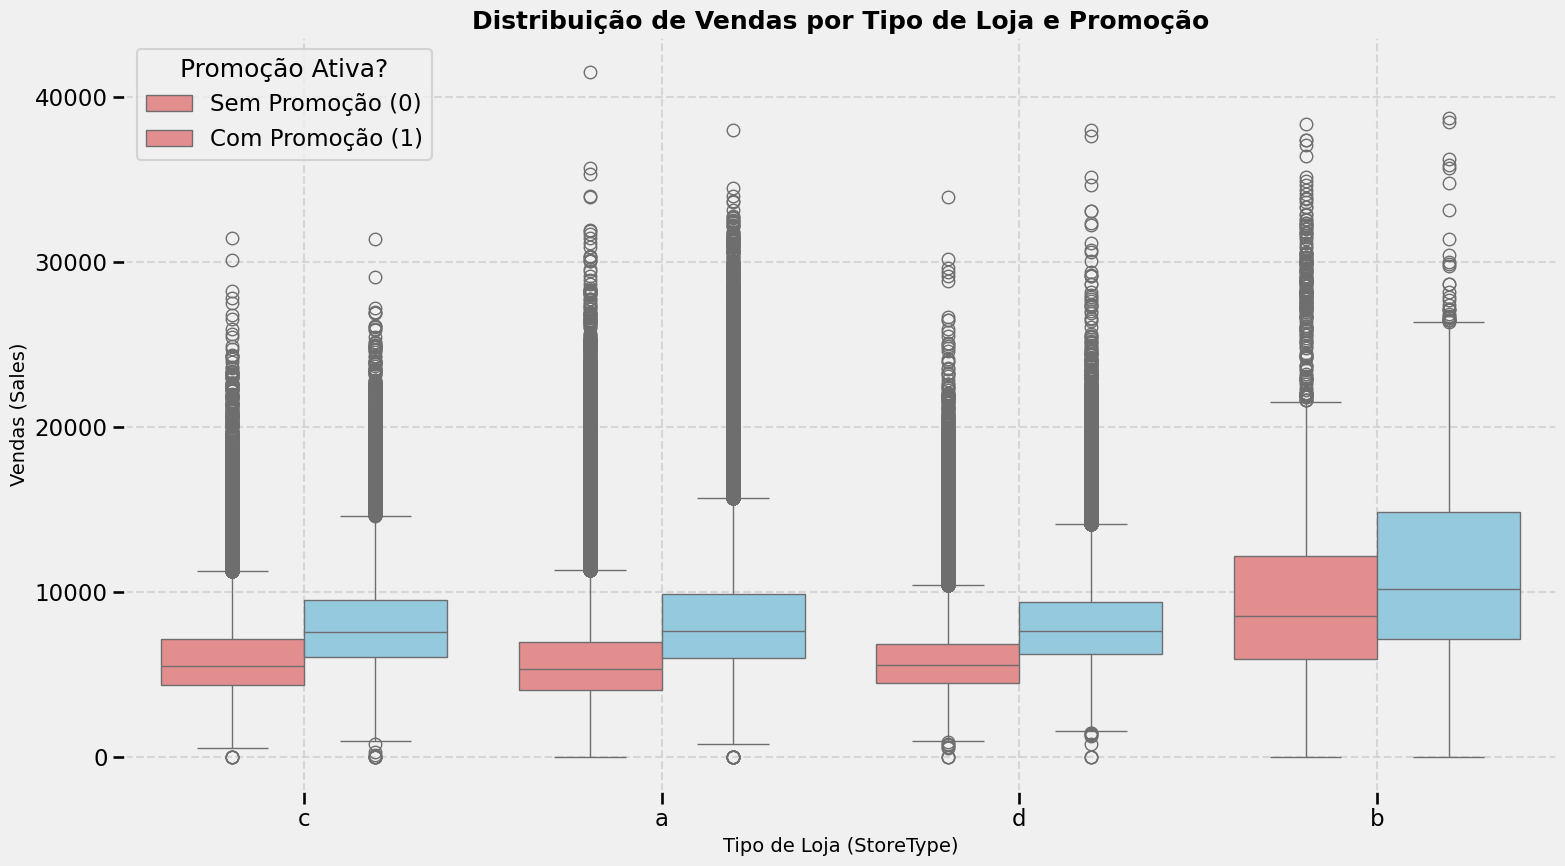

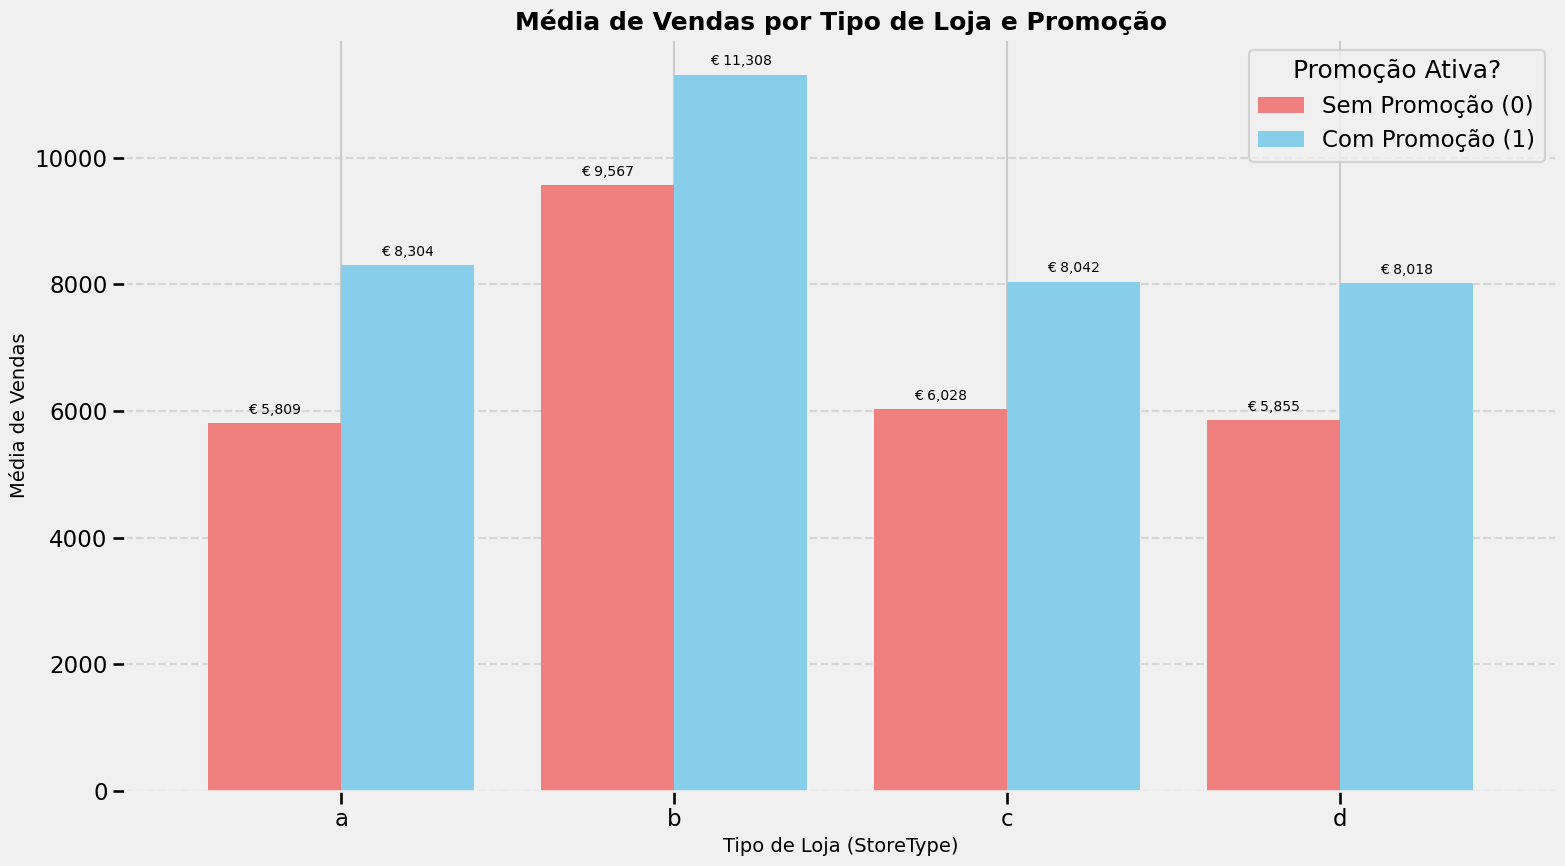

In [18]:
# Calcular estatísticas descritivas de Sales agrupadas por StoreType e Promo
desc_sales_promo_storetype = df_completo.groupby(['StoreType', 'Promo'])['Sales'].describe()
print(desc_sales_promo_storetype)

# Calcular o aumento percentual médio nas vendas com promoção para cada StoreType
print("\n--- Aumento Percentual Médio nas Vendas com Promoção por Tipo de Loja ---")
for store_type in df_completo['StoreType'].unique():
    if store_type in desc_sales_promo_storetype.index:
        try:
            mean_sales_no_promo = desc_sales_promo_storetype.loc[(store_type, 0), 'mean']
            mean_sales_with_promo = desc_sales_promo_storetype.loc[(store_type, 1), 'mean']

            if mean_sales_no_promo > 0:
                lift_percentual = ((mean_sales_with_promo - mean_sales_no_promo) / mean_sales_no_promo) * 100
                print(f"StoreType '{store_type}':")
                print(f"  Média de Vendas sem Promoção (Promo=0): € {mean_sales_no_promo:,.2f}")
                print(f"  Média de Vendas com Promoção (Promo=1): € {mean_sales_with_promo:,.2f}")
                print(f"  Aumento percentual médio: {lift_percentual:.2f}%")
            else:
                print(f"StoreType '{store_type}': Média de vendas sem promoção é zero, não é possível calcular o aumento.")
        except KeyError:
            print(f"StoreType '{store_type}': Não foi possível encontrar dados para Promo=0 e Promo=1 para calcular o aumento.")
    print("-" * 40)

plt.style.use('fivethirtyeight')
sns.set_context('talk')

plt.figure(figsize=(16, 9))
sns.boxplot(x='StoreType', y='Sales', hue='Promo', data=df_completo, palette=['lightcoral', 'skyblue'])
plt.title('Distribuição de Vendas por Tipo de Loja e Promoção', fontsize=18, fontweight='bold')
plt.xlabel('Tipo de Loja (StoreType)', fontsize=14)
plt.ylabel('Vendas (Sales)', fontsize=14)
plt.legend(title='Promoção Ativa?', labels=['Sem Promoção (0)', 'Com Promoção (1)'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calcular a média de vendas agrupada
mean_sales_promo_storetype = df_completo.groupby(['StoreType', 'Promo'])['Sales'].mean().unstack()

# Aplicar estilo e contexto (já presente no seu código)
plt.style.use('fivethirtyeight')
sns.set_context('talk')

# Plotar o gráfico de barras
# A chamada .plot() retorna um objeto Axes, que vamos chamar de 'ax'
ax = mean_sales_promo_storetype.plot(kind='bar', figsize=(16, 9),
                                     color=['lightcoral', 'skyblue'],
                                     width=0.8) # A largura total para o grupo de barras

plt.title('Média de Vendas por Tipo de Loja e Promoção', fontsize=18, fontweight='bold')
plt.xlabel('Tipo de Loja (StoreType)', fontsize=14)
plt.ylabel('Média de Vendas', fontsize=14)
plt.xticks(rotation=0) # Mantém os rótulos do eixo x na horizontal
plt.legend(title='Promoção Ativa?', labels=['Sem Promoção (0)', 'Com Promoção (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7) # Grade apenas no eixo y para clareza

# Adicionar valores centralizados nas barras
# Iteramos sobre cada 'patch' (barra) no gráfico
for bar in ax.patches:
    # bar.get_height() é o valor da média (altura da barra)
    yval = bar.get_height()

    # bar.get_x() é a coordenada x da borda esquerda da barra
    # bar.get_width() é a largura da barra
    # A posição x centralizada para o texto é: borda_esquerda + metade_da_largura
    xval = bar.get_x() + bar.get_width() / 2

    # Formatar o rótulo do valor
    label = f'€ {yval:,.0f}' # Formata como moeda, sem casas decimais

    # Adicionar o texto no gráfico
    ax.text(xval,           # Posição x centralizada
            yval + 100,     # Posição y (um pouco acima da barra, ajuste o '100' se necessário)
            label,          # O texto do rótulo
            ha='center',    # Alinhamento horizontal centralizado
            va='bottom',    # Alinhamento vertical (base do texto na posição y)
            fontsize=10,    # Tamanho da fonte do rótulo
            color='black')  # Cor do rótulo

plt.tight_layout() # Ajusta o layout para evitar que os elementos se sobreponham
plt.show()

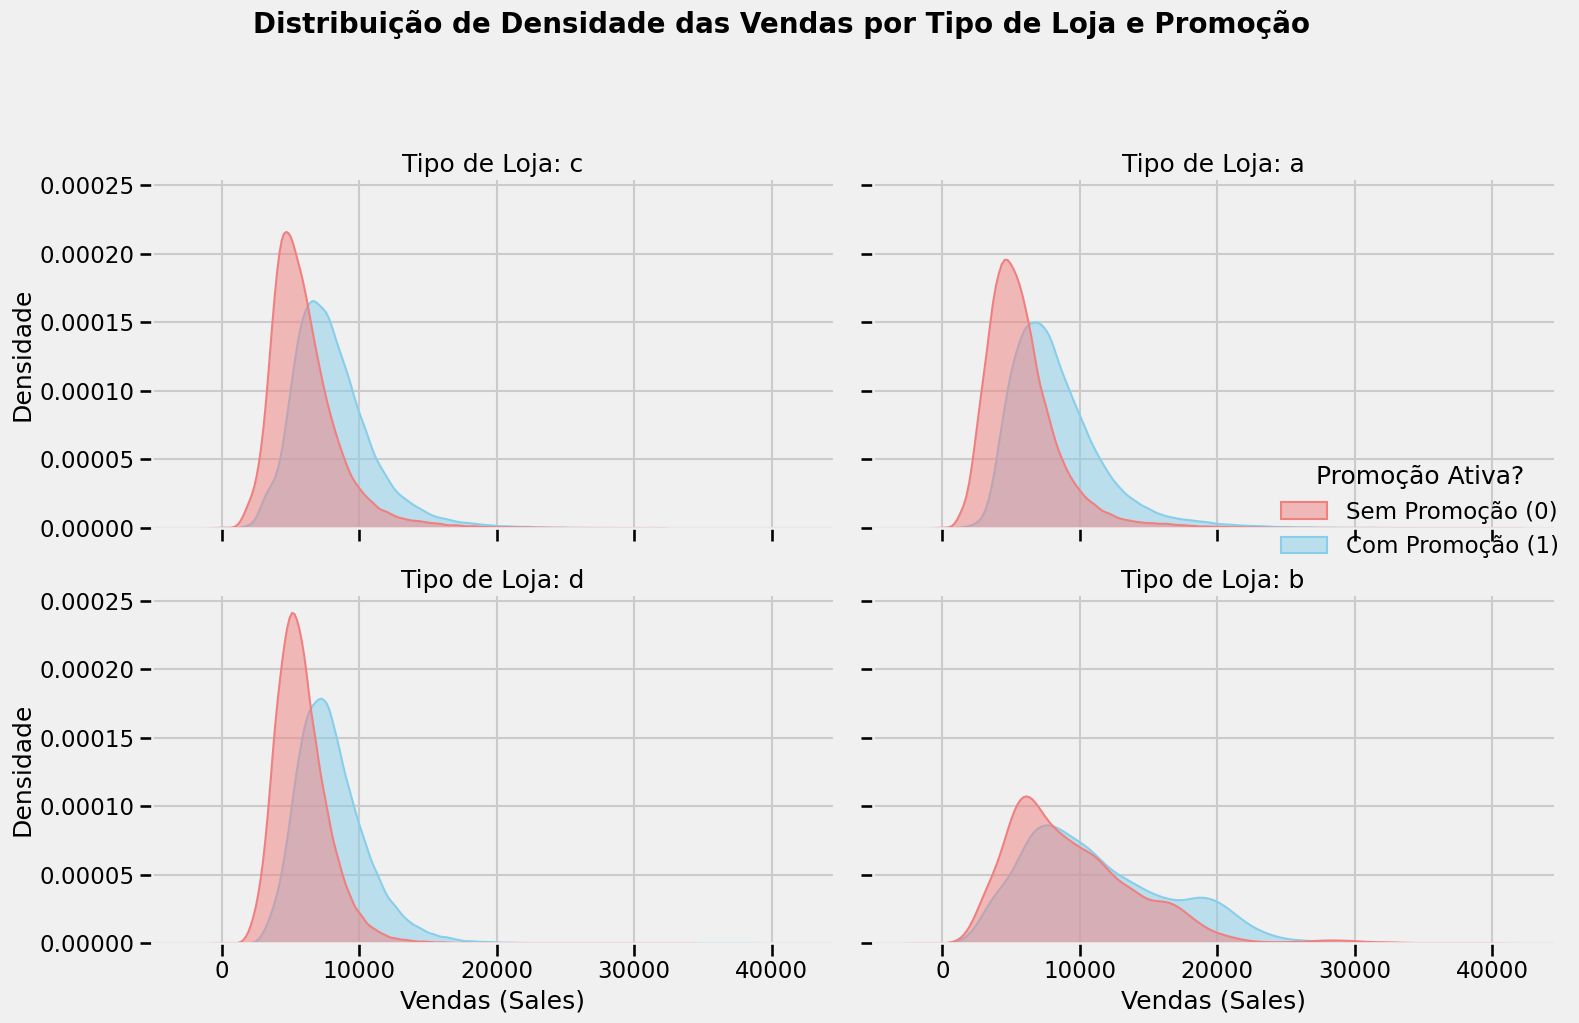

In [19]:
plt.style.use('fivethirtyeight')
sns.set_context('talk')

# Criar o gráfico de densidade facetado
g = sns.displot(
    data=df_completo,
    x='Sales',
    hue='Promo',  # Diferencia por promoção (0 ou 1)
    col='StoreType',  # Cria uma coluna de subplots para cada tipo de loja
    kind='kde',  # Especifica que queremos um gráfico de densidade
    col_wrap=2,  # Define quantas colunas de subplots teremos (ajuste conforme necessário)
    fill=True,  # Preenche a área sob a curva de densidade
    alpha=0.5,  # Define a transparência do preenchimento
    height=5,  # Define a altura de cada faceta
    aspect=1.5,  # Define a proporção da largura para a altura de cada faceta
    palette=['lightcoral', 'skyblue'], # Cores para Sem Promoção e Com Promoção
    common_norm=False # Normaliza cada densidade individualmente
)

# Ajustar títulos e rótulos
g.set_axis_labels('Vendas (Sales)', 'Densidade')
g.set_titles("Tipo de Loja: {col_name}") # Título para cada subplot
g.fig.suptitle('Distribuição de Densidade das Vendas por Tipo de Loja e Promoção',
               fontsize=20, fontweight='bold', y=1.03) # Título geral

# Melhorar a legenda
try:
    # Para versões mais recentes do Seaborn, a legenda pode ser acessada de outra forma
    if hasattr(g, '_legend'):
        g._legend.set_title('Promoção Ativa?')
        new_labels = ['Sem Promoção (0)', 'Com Promoção (1)']
        for t, l in zip(g._legend.texts, new_labels):
            t.set_text(l)
    # Para versões mais antigas, pode ser necessário um workaround ou ajuste manual
except Exception as e:
    print(f"Ajuste manual da legenda pode ser necessário: {e}")


# Pode ser útil limitar o eixo X se houver outliers extremos que achatam a visualização
# Para cada eixo no displot:
# for ax in g.axes.flat:
# ax.set_xlim(0, df_completo['Sales'].quantile(0.99)) # Exemplo: limita ao percentil 99

plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajusta para o suptitle
plt.show()